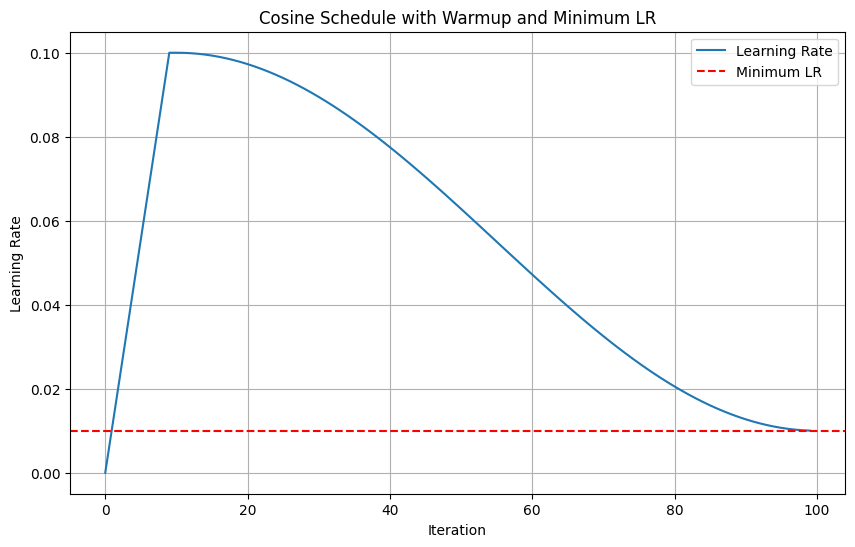

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

def cosine_scheduler(base_value, final_value, epochs, niter_per_ep, warmup_epochs=0,
                     start_warmup_value=0, warmup_steps=-1):
    warmup_schedule = np.array([])
    warmup_iters = warmup_epochs * niter_per_ep
    if warmup_steps > 0:
        warmup_iters = warmup_steps
    if warmup_epochs > 0:
        warmup_schedule = np.linspace(start_warmup_value, base_value, warmup_iters)

    iters = np.arange(epochs * niter_per_ep - warmup_iters)
    schedule = np.array(
        [final_value + 0.5 * (base_value - final_value) * (1 + math.cos(math.pi * i / (len(iters)))) for i in iters])

    schedule = np.concatenate((warmup_schedule, schedule))

    return schedule

# Parameters
base_value = 0.1  # base learning rate
final_value = 0.01  # final learning rate (minimum)
epochs = 100  # total epochs
niter_per_ep = 1  # iterations per epoch, assuming 1 for simplification
warmup_epochs = 10  # warmup epochs
start_warmup_value = 0  # starting learning rate for warmup

# Generate schedule
schedule = cosine_scheduler(base_value, final_value, epochs, niter_per_ep, warmup_epochs, start_warmup_value)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(schedule, label="Learning Rate")
plt.axhline(y=final_value, color='r', linestyle='--', label="Minimum LR")
plt.xlabel("Iteration")
plt.ylabel("Learning Rate")
plt.title("Cosine Schedule with Warmup and Minimum LR")
plt.legend()
plt.grid(True)
plt.show()


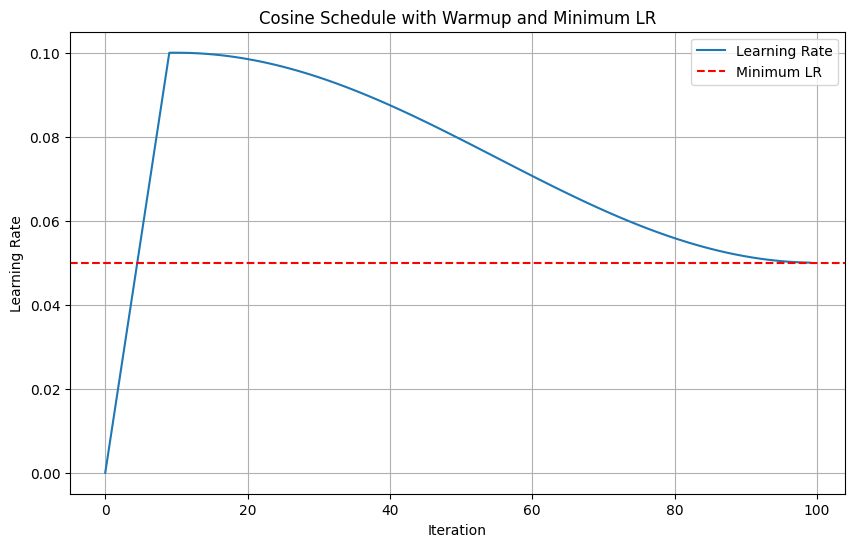

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

def cosine_scheduler(base_value, final_value, epochs, niter_per_ep, warmup_epochs=0,
                     start_warmup_value=0, warmup_steps=-1):
    warmup_schedule = np.array([])
    warmup_iters = warmup_epochs * niter_per_ep
    if warmup_steps > 0:
        warmup_iters = warmup_steps
    if warmup_epochs > 0:
        warmup_schedule = np.linspace(start_warmup_value, base_value, warmup_iters)

    iters = np.arange(epochs * niter_per_ep - warmup_iters)
    schedule = np.array(
        [final_value + 0.5 * (base_value - final_value) * (1 + math.cos(math.pi * i / (len(iters)))) for i in iters])

    schedule = np.concatenate((warmup_schedule, schedule))

    return schedule

# Parameters
base_value = 0.1  # base learning rate
final_value = 0.05  # final learning rate (minimum)
epochs = 100  # total epochs
niter_per_ep = 1  # iterations per epoch, assuming 1 for simplification
warmup_epochs = 10  # warmup epochs
start_warmup_value = 0  # starting learning rate for warmup

# Generate schedule
schedule = cosine_scheduler(base_value, final_value, epochs, niter_per_ep, warmup_epochs, start_warmup_value)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(schedule, label="Learning Rate")
plt.axhline(y=final_value, color='r', linestyle='--', label="Minimum LR")
plt.xlabel("Iteration")
plt.ylabel("Learning Rate")
plt.title("Cosine Schedule with Warmup and Minimum LR")
plt.legend()
plt.grid(True)
plt.show()


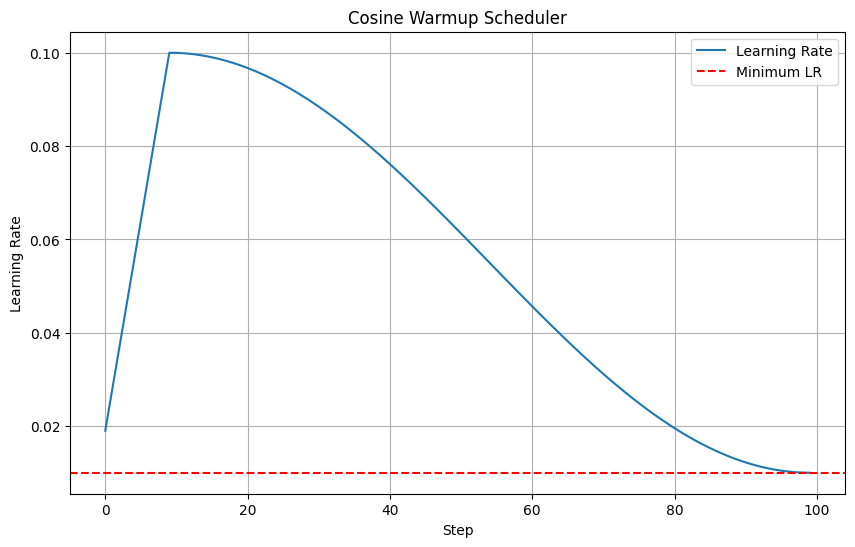

In [3]:
import torch
import warnings
from torch.optim.lr_scheduler import _LRScheduler


class CosineWarmupScheduler(_LRScheduler):
    def __init__(self, optimizer, num_warmup_steps, num_training_steps, num_cycles=0.5, min_lr=0.05, last_epoch=-1, verbose=False):
        self.num_warmup_steps = num_warmup_steps
        self.num_training_steps = num_training_steps
        self.num_cycles = num_cycles
        self.min_lr = min_lr
        self.base_lrs = [group['lr'] for group in optimizer.param_groups]
        super().__init__(optimizer, last_epoch, verbose)

    def get_lr(self):
        if not self._get_lr_called_within_step:
            warnings.warn("To get the last learning rate computed by the scheduler, "
                          "please use `get_last_lr()`.", UserWarning)
        
        lrs = []
        for base_lr in self.base_lrs:
            if self.last_epoch < self.num_warmup_steps:
                # Linear warmup
                lr = (base_lr - self.min_lr) * self.last_epoch / max(1, self.num_warmup_steps) + self.min_lr
            else:
                # Cosine annealing
                progress = (self.last_epoch - self.num_warmup_steps) / max(1, self.num_training_steps - self.num_warmup_steps)
                lr = self.min_lr + (base_lr - self.min_lr) * 0.5 * (1 + math.cos(math.pi * self.num_cycles * 2.0 * progress))
            lrs.append(lr)
        return lrs

# 간단한 모델 및 옵티마이저 준비
model = torch.nn.Linear(1, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

# 스케줄러 생성
min_lr = 0.01
scheduler = CosineWarmupScheduler(optimizer, num_warmup_steps=10, num_training_steps=100, num_cycles=0.5, min_lr=min_lr)

# 학습률 변화 기록
lrs = []
for epoch in range(100):
    optimizer.step()
    scheduler.step()
    lrs.append(optimizer.param_groups[0]['lr'])

# 학습률 변화 그래프 시각화
plt.figure(figsize=(10, 6))
plt.plot(lrs, label="Learning Rate")
plt.axhline(y=min_lr, color='r', linestyle='--', label="Minimum LR")
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Cosine Warmup Scheduler")
plt.legend()
plt.grid(True)
plt.show()

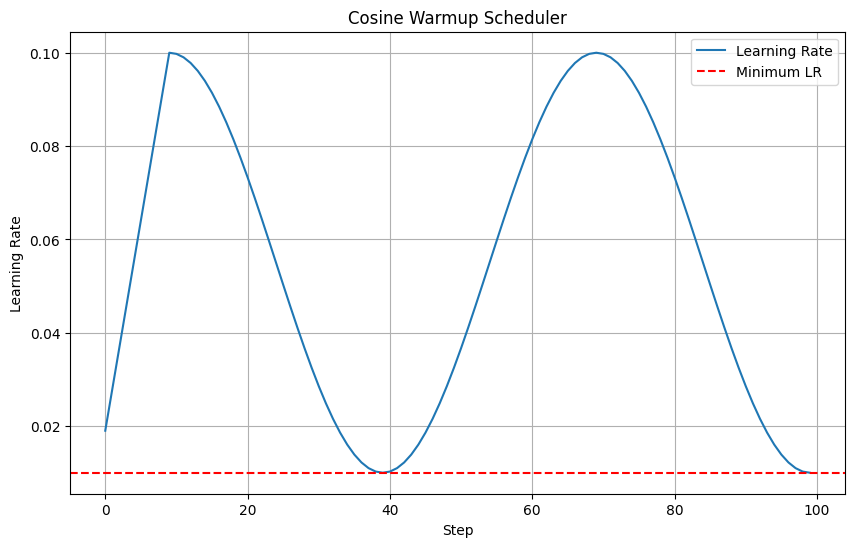

In [4]:
# 간단한 모델 및 옵티마이저 준비
model = torch.nn.Linear(1, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

# 스케줄러 생성
min_lr = 0.01
scheduler = CosineWarmupScheduler(optimizer, num_warmup_steps=10, num_training_steps=100, num_cycles=1.5, min_lr=min_lr)

# 학습률 변화 기록
lrs = []
for epoch in range(100):
    optimizer.step()
    scheduler.step()
    lrs.append(optimizer.param_groups[0]['lr'])

# 학습률 변화 그래프 시각화
plt.figure(figsize=(10, 6))
plt.plot(lrs, label="Learning Rate")
plt.axhline(y=min_lr, color='r', linestyle='--', label="Minimum LR")
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Cosine Warmup Scheduler")
plt.legend()
plt.grid(True)
plt.show()

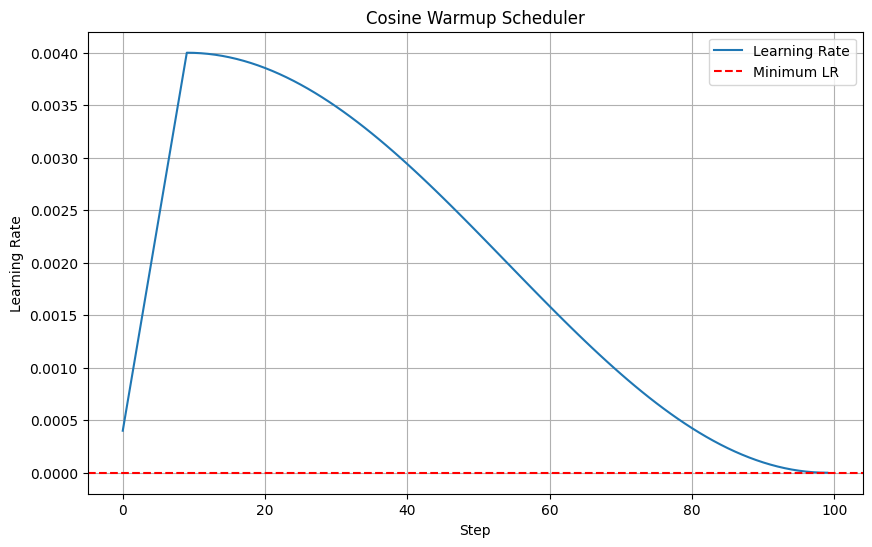

In [8]:
# 간단한 모델 및 옵티마이저 준비
model = torch.nn.Linear(1, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=4e-3)

# 스케줄러 생성
min_lr = 1e-6
scheduler = CosineWarmupScheduler(optimizer, num_warmup_steps=10, num_training_steps=100, num_cycles=0.5, min_lr=min_lr)

# 학습률 변화 기록
lrs = []
for epoch in range(100):
    optimizer.step()
    scheduler.step()
    lrs.append(optimizer.param_groups[0]['lr'])

# 학습률 변화 그래프 시각화
plt.figure(figsize=(10, 6))
plt.plot(lrs, label="Learning Rate")
plt.axhline(y=min_lr, color='r', linestyle='--', label="Minimum LR")
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Cosine Warmup Scheduler")
plt.legend()
plt.grid(True)
plt.show()

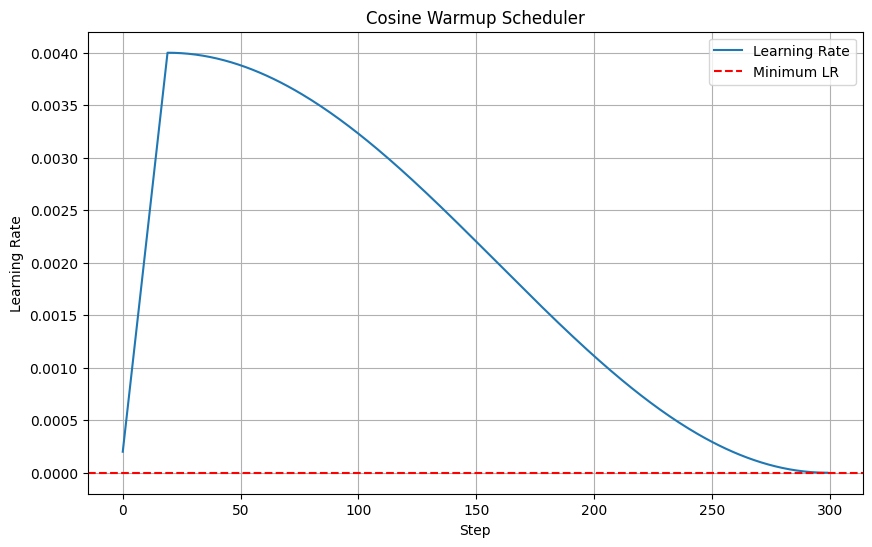

In [13]:
# 간단한 모델 및 옵티마이저 준비
model = torch.nn.Linear(1, 1)
optimizer = torch.optim.Adam(model.parameters(), lr=4e-3)

# 스케줄러 생성
min_lr = 1e-6
warmup_steps = 20
total_steps = 300
scheduler = CosineWarmupScheduler(optimizer, num_warmup_steps=warmup_steps, num_training_steps=total_steps, num_cycles=0.5, min_lr=min_lr)

# 학습률 변화 기록
lrs = []
for epoch in range(total_steps):
    optimizer.step()
    scheduler.step()
    lrs.append(optimizer.param_groups[0]['lr'])

# 학습률 변화 그래프 시각화
plt.figure(figsize=(10, 6))
plt.plot(lrs, label="Learning Rate")
plt.axhline(y=min_lr, color='r', linestyle='--', label="Minimum LR")
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.title("Cosine Warmup Scheduler")
plt.legend()
plt.grid(True)
plt.show()